<a href="https://colab.research.google.com/github/Devnaam/Bivariate-analysis/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset from the uploaded CSV file
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows to make sure it loaded correctly
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# Get a summary of the DataFrame
print("\n--- DataFrame Information ---")
df.info()



--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51590 non-null  float64
 12  V12     51590 non-null  float64
 13  V13     51590 non-null  float64
 14  V14     51590 non-null  float64
 15  V15     51590 non-null  float64
 16  V16     51590 non-null  float64
 17  V17     51590 non-null  float64
 18  V18     51590 non-null  float64
 19  V19     51590 non-null  float64
 20  V20     51590 non-null  float64
 21  V21 

In [4]:
# Get statistical summary of numerical columns
print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
               Time            V1            V2            V3            V4  \
count  51591.000000  51591.000000  51591.000000  51591.000000  51591.000000   
mean   29408.888120     -0.244221      0.003887      0.691974      0.183611   
std    13196.047307      1.887998      1.641193      1.498371      1.398830   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    22655.500000     -0.993823     -0.570329      0.215237     -0.723584   
50%    33767.000000     -0.246892      0.075692      0.793662      0.190588   
75%    39498.000000      1.154831      0.731302      1.429386      1.066994   
max    45026.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  51591.000000  51591.000000  51591.000000  51591.000000  51591.000000   
mean      -0.259039      0.104715     -0.120474      0.054468      0.108449   
std        1.413486   


--- Class Distribution ---
Class
0.0    51440
1.0      150
Name: count, dtype: int64

Fraudulent transactions make up 0.2907% of the total.


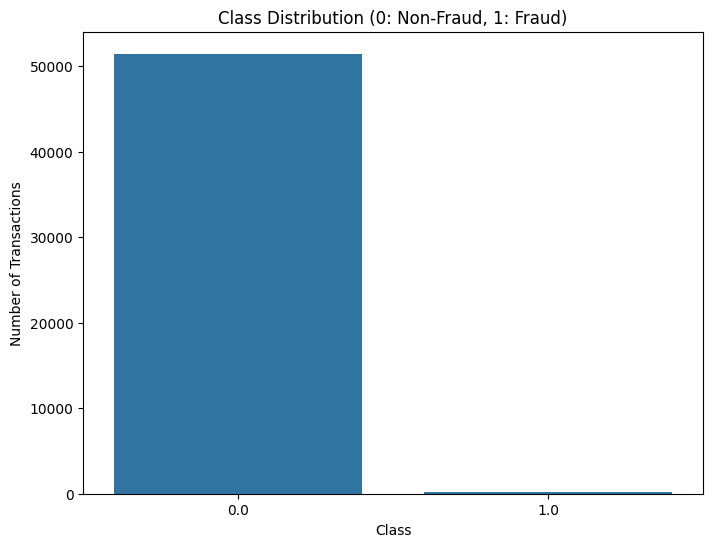

In [5]:
# Count the number of transactions for each class
print("\n--- Class Distribution ---")
print(df['Class'].value_counts())

# Calculate the percentage of fraudulent transactions
fraud_count = df['Class'].value_counts()[1]
total_count = len(df)
fraud_percentage = (fraud_count / total_count) * 100
print(f"\nFraudulent transactions make up {fraud_percentage:.4f}% of the total.")

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

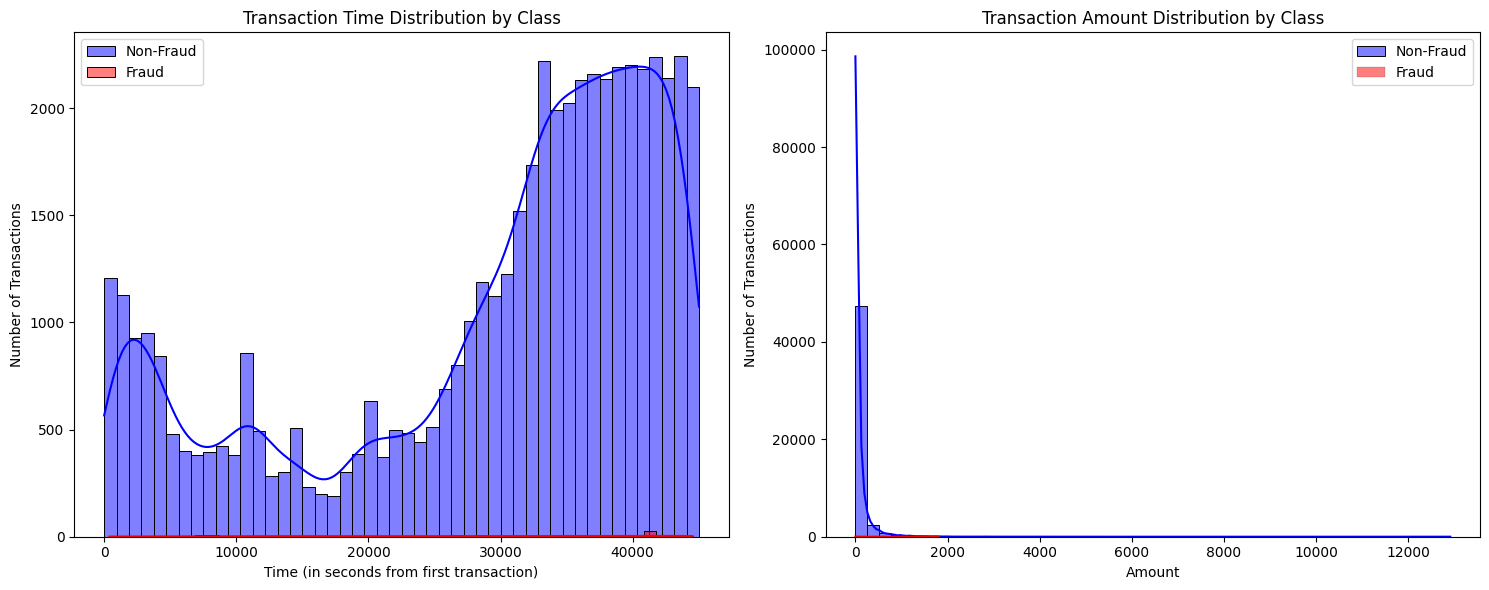

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Time distribution by Class
sns.histplot(df[df['Class'] == 0]['Time'], bins=48, ax=ax1, color='blue', kde=True, label='Non-Fraud')
sns.histplot(df[df['Class'] == 1]['Time'], bins=48, ax=ax1, color='red', kde=True, label='Fraud')
ax1.set_title('Transaction Time Distribution by Class')
ax1.set_xlabel('Time (in seconds from first transaction)')
ax1.set_ylabel('Number of Transactions')
ax1.legend()

# Amount distribution by Class
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, ax=ax2, color='blue', kde=True, label='Non-Fraud')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, ax=ax2, color='red', kde=True, label='Fraud')
ax2.set_title('Transaction Amount Distribution by Class')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Number of Transactions')
ax2.legend()
plt.tight_layout()
plt.show()

**Phase 3: Data Preprocessing**


In [7]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Scale the 'Amount' and 'Time' columns
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns as they are no longer needed
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder the columns to place our new scaled features at the front
scaled_features = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_features)
df.insert(1, 'scaled_time', scaled_time)

# Display the first few rows to confirm the changes
print("--- DataFrame after Scaling ---")
print(df.head())

--- DataFrame after Scaling ---
   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       0.219338    -2.228635 -1.359807 -0.072781  2.536347  1.378155   
1      -0.360231    -2.228635  1.191857  0.266151  0.166480  0.448154   
2       1.122791    -2.228559 -1.358354 -1.340163  1.773209  0.379780   
3       0.116307    -2.228559 -0.966272 -0.185226  1.792993 -0.863291   
4      -0.094765    -2.228483 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       

In [9]:
from sklearn.model_selection import train_test_split

# Remove rows with missing values
df.dropna(inplace=True)

# Define our features (X) and target (y)
X = df.drop('Class', axis=1) # All columns except 'Class'
y = df['Class']             # The 'Class' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Get the number of fraudulent transactions in the training set
fraud_count = y_train.value_counts()[1]

# Create an undersampler instance
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Apply undersampling to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Print the new class distribution
print("\n--- Class Distribution after Undersampling ---")
print(y_train_resampled.value_counts())


--- Class Distribution after Undersampling ---
Class
0.0    120
1.0    120
Name: count, dtype: int64


**Phase 4: Model Building and Evaluation**


In [11]:
# Import necessary classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create instances of the classifiers
log_reg = LogisticRegression(solver='liblinear', random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Dictionary to hold our models for easy iteration
models = {'Logistic Regression': log_reg, 'Decision Tree': dtree, 'Random Forest': rfc}

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    print(f"{name} trained successfully.\n")

Training Logistic Regression...
Logistic Regression trained successfully.

Training Decision Tree...
Decision Tree trained successfully.

Training Random Forest...
Random Forest trained successfully.



In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate each model on the original, imbalanced test set
for name, model in models.items():
    print(f"--- Evaluating {name} ---")
    y_pred = model.predict(X_test)

    # Print the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)


    # Calculate and print the evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}\n")

--- Evaluating Logistic Regression ---
Confusion Matrix:
 [[9993  295]
 [   0   30]]
Precision: 0.0923
Recall:    1.0000
F1-Score:  0.1690

--- Evaluating Decision Tree ---
Confusion Matrix:
 [[9498  790]
 [   1   29]]
Precision: 0.0354
Recall:    0.9667
F1-Score:  0.0683

--- Evaluating Random Forest ---
Confusion Matrix:
 [[10143   145]
 [    1    29]]
Precision: 0.1667
Recall:    0.9667
F1-Score:  0.2843



**Phase 5: Model Improvement and Conclusion**


In [13]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],     # Max number of levels in each tree
    'min_samples_split': [2, 5, 10]  # Min number of data points to split a node
}

# Create a GridSearchCV instance with our Random Forest model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to our resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best F1 score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score found: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_rfc = grid_search.best_estimator_

Best parameters found:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 score found: 0.9646


**Final Evaluation with the Tuned Model**

In [14]:
from sklearn.metrics import classification_report

# Make predictions on the original test set with the best model
y_pred_tuned = best_rfc.predict(X_test)

# Print the final classification report
print("\n--- Final Classification Report for the Tuned Model ---")
print(classification_report(y_test, y_pred_tuned))


--- Final Classification Report for the Tuned Model ---
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     10288
         1.0       0.15      0.97      0.26        30

    accuracy                           0.98     10318
   macro avg       0.58      0.98      0.63     10318
weighted avg       1.00      0.98      0.99     10318



**Saving the Final Model**

In [15]:
import joblib

# Save the best model to a file
joblib.dump(best_rfc, 'best_fraud_detection_model.pkl')
print("\nFinal model saved as 'best_fraud_detection_model.pkl'")

# To load the model later:
# loaded_model = joblib.load('best_fraud_detection_model.pkl')


Final model saved as 'best_fraud_detection_model.pkl'
